# Exercise Eleven: PCA
Drawing on our example from class and the discussion of PCA in Data-Sitters Club,

- Import at least ten documents from files, using the OS module and any others relevant to process the text
- Isolate a component (the example was nouns - try verbs or adjectives) using nltk and prepare appropriate sub-files for comparison on that axis
- Load the documents and titles and run the contents through vectorize, using the provided boilerplate
- Run a simple (2 word) vizualization comparing all texts
- Run a full (PCA) vizualization comparing all texts using the provided PCA boilerplate. Note any interesting characteristics or outliers in a brief analysis

Bonus Challenge: Depending on your interests, you might either try using an API to collect the texts rather than saving them to a directory, or you might use Bokeh to attempt an exportable visualization of some aspect of what you've collected.

## Import Documents From Files

Using the seven texts imported in Exercise Seven, plus four more, to continue to build on the analysis of liberty vs. duty.  


The original documents selected were:

- Artistotle - Politics, A Treatise on Government
- Hume - A Treatise of Human Nature
- Kant - The Critique of Pure Reason
- Locke - Second Treatise of Government
- Mill - On Liberty
- Plato - The Republic
- Thoreau - Walden

The added documents are:

- Descartes - A Discourse on Method
- Dewey - Democracy and Education
- Machiavelli - The Prince
- Marx - Communist Manifesto

All texts added to gitignore.
 

In [2]:
import nltk
nltk.download('averaged_perceptron_tagger')

import os

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ShelleyM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [19]:
textdir = 'C:\\Users\\ShelleyM\\Dropbox\\UCFTandT\\PhilosophyTexts\\'


os.chdir(textdir)

## Isolate Verbs

In [22]:
for filename in os.listdir(textdir):
    
    if filename.endswith('.txt'):
        
        outname = filename.replace('.txt','-verbs.txt')
        
        with open(filename, 'r', encoding="utf-8") as f:
            
            with open(outname, 'w') as out:
                
                text = f.read()
                
                sentences = nltk.sent_tokenize(text)
               
                for sentence in sentences:
                    
                    for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                        #If the part-of-speech is noun
                        #if (pos == 'NN' or pos == 'NNS'):
                        #You can sub in other parts of speech, too
                        #Just comment out the noun code, and uncomment one of these
                        #Adverbs
                        #if (pos == 'RB' or pos == 'RBR' or pos == 'RBS'):
                        #Adjectives
                        #if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS'):
                        #Verbs
                        if (pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
                           
                            out.write(word)
                            
                            out.write(' ')

## Load the documents and titles 
## Run the contents through vectorize

In [23]:
def load_directory(directory, max_length):
    documents, titles = [], []
    for filename in os.scandir(directory):
        #change this to analyze a different component after changing the save above
        if not filename.name.endswith('-verbs.txt'):
            continue

        with open(filename.path) as f:
            contents = f.read()
        lemmas = contents.lower().split()
        start_idx, end_idx, segm_cnt = 0, max_length, 1

        # extract slices from the text:
        while end_idx < len(lemmas):
            documents.append(' '.join(lemmas[start_idx:end_idx]))
            title = filename.name.replace('-verbs.txt', '')
            titles.append(f"{title}-{segm_cnt}")

            start_idx += max_length
            end_idx += max_length
            segm_cnt += 1

    return documents, titles

In [24]:
documents, titles = load_directory(textdir, 10000)
import sklearn.feature_extraction.text as text
print(titles[0])

vectorizer = text.CountVectorizer(max_features=30, token_pattern=r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()

print(v_documents.shape)
print(vectorizer.get_feature_names()[:10])

Artistotle-1
(12, 30)
['according', 'am', 'are', 'be', 'been', 'being', 'consider', 'do', 'does', 'find']


## Run Two Word Visualization

- consider
- find

[Text(0.5, 0, 'consider'), Text(0, 0.5, 'find')]

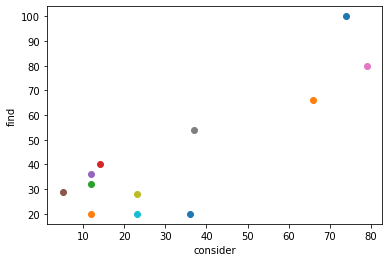

In [25]:
import matplotlib.pyplot as plt
import numpy as np

words = vectorizer.get_feature_names()
titles = np.array(titles)
x = v_documents[:, words.index('consider')]
y = v_documents[:, words.index('find')]

fig, ax = plt.subplots()
for title in set(titles):
    ax.scatter(x[titles==title], y[titles==title], label=title)
ax.set(xlabel='consider', ylabel='find')
# plt.legend();

## Run Full PCA Visualization 

Notes:  I am not sure that the visualization is showing exactly what was asked. I tried to use the first three letters of the file name to represent the documents.  There are 11 documents showing on the scatter plot, however some of the file names are repeated and others are not included.



In [26]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
documents_proj = pca.fit_transform(v_documents)

print(v_documents.shape)
print(documents_proj.shape)

(12, 30)
(12, 2)


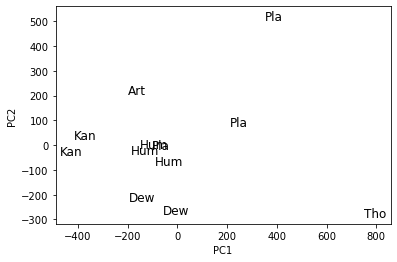

In [36]:
c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

fig, ax = plt.subplots()
ax.scatter(c1, c2, facecolors='none')

for p1, p2, title in zip(c1, c2, titles):
    ax.text(p1, p2, title[0:3], fontsize=12,
            ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2');

## Bonus Challenge - Bokeh

- Downloads
- Project Gutenberg Release Date

In [1]:

from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook


output_file(filename="authors.html", title="Authors Popularity Visualization")

In [2]:
import pandas as pd
df = pd.read_csv('File1.csv')
print(df.dtypes)

Name           object
Author         object
Nationality    object
Downloads       int64
ReleaseYear     int64
dtype: object


In [3]:
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.io import output_notebook

In [4]:
sample = df.sample(10)
source = ColumnDataSource(sample)

p = figure()
p.circle(x='ReleaseYear', y='Downloads',
         source=source,
         size=20, color='blue')

p.title.text = 'Author Popularity'
p.xaxis.axis_label = 'Project Gutenberg Release Year'
p.yaxis.axis_label = 'Downloads in Last 30 Days'

In [5]:
hover = HoverTool()
hover.tooltips=[
    ('Title', '@Name'),
    ('Author', '@Author'),
    ('Nationality', '@Nationality'),
    ('Downloads', '@Downloads')
]

p.add_tools(hover)

output_notebook()

Loading BokehJS ...

In [6]:
show(p)
save(p)

'c:\\Users\\ShelleyM\\Dropbox\\My PC (Shel-Win10-PC)\\Documents\\GitHub\\Des-Dev-2021\\Week11\\authors.html'